In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
.consoleMachineFont {color:blue;font-family:Courier}
.consoleUserFont {font-family:Courier}
</style>

# Object-Oriented Programming (part 2/2)
## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Agenda: Object-Oriented Programming (OOP)
- Building classes
    - Exam question: TRange
 

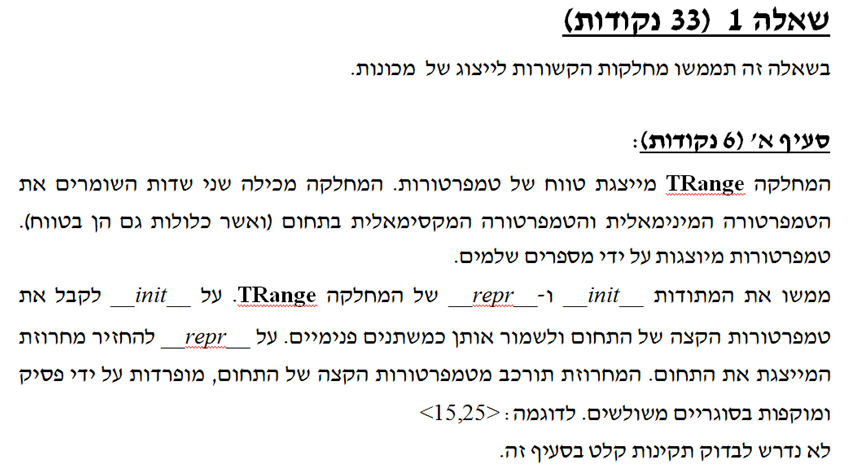

In [ ]:
class TRange:

    def __init__(self, min_temp, max_temp):
        self.min_temp = min_temp
        self.max_temp = max_temp

    def __repr__(self):
        return f"<{self.min_temp},{self.max_temp}>" # <" + str(self.min_temp) + "," + str(self.max_temp) + ">"

In [ ]:
print(TRange(10,20))

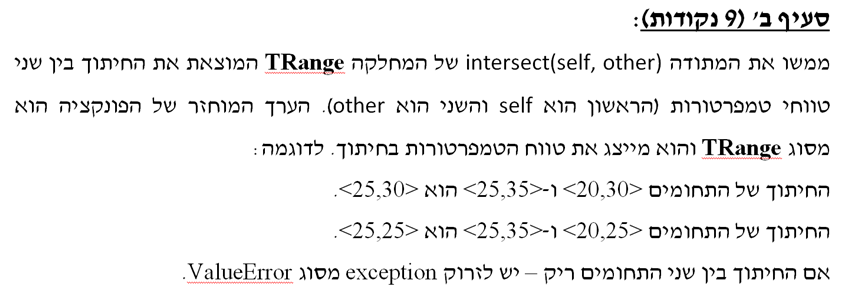


In [ ]:
class TRange:

    def __init__(self, min_temp, max_temp):
        self.min_temp = min_temp
        self.max_temp = max_temp

    def __repr__(self):
        return "<" + str(self.min_temp) + "," + str(self.max_temp) + ">"

    def intersect(self, other):
        min_temp_result = max(self.min_temp, other.min_temp)
        max_temp_result = min(self.max_temp, other.max_temp)
        if min_temp_result > max_temp_result:
            print('No intersection!')
            return
        return TRange(min_temp_result, max_temp_result)

#### <span style='color:purple'>(6): What will be printed?</span>

In [ ]:
t1=TRange(10,20)
t2=TRange(15,25)
print(t1.intersect(t2))

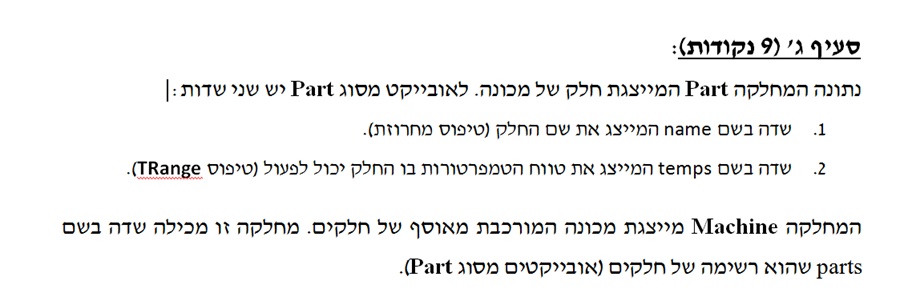

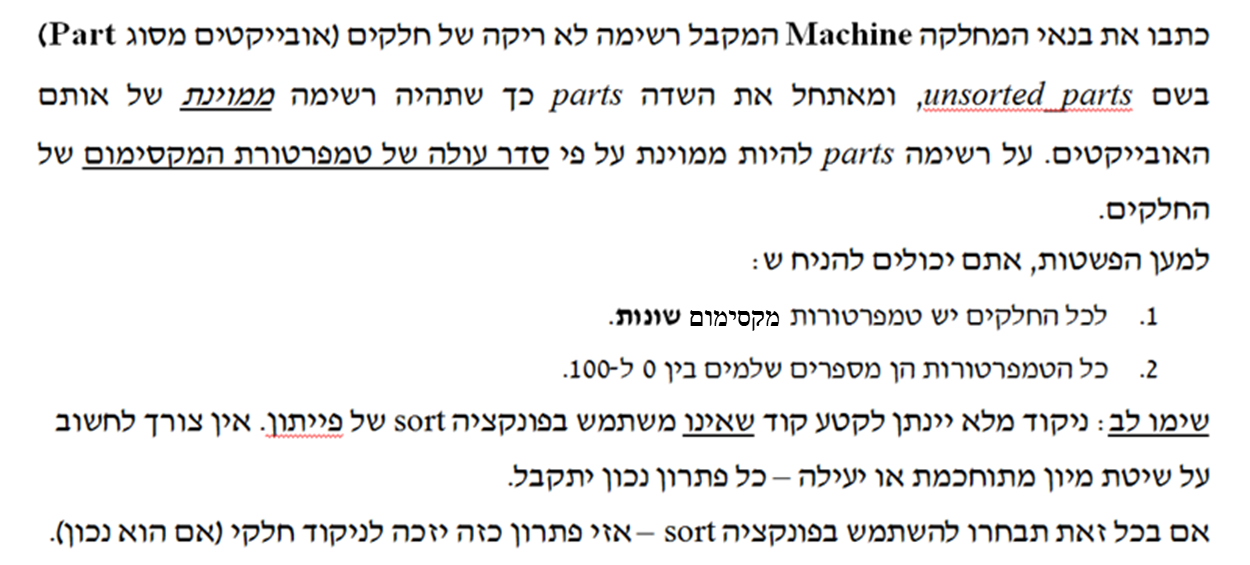




In [ ]:
class Machine:
    def __init__(self, unsorted_parts):
        self.parts = []
        last_part_max_temp = -1
        next_part = None
        for index in range(len(unsorted_parts)):
            next_max_temp = 101
            for part in unsorted_parts:

                # Analyze all parts that have not been sorted yet
                if part.temps.max_temp > last_part_max_temp and \
                   part.temps.max_temp < next_max_temp:
                        next_max_temp = part.temps.max_temp
                        next_part = part
            self.parts.append(next_part)
            last_part_max_temp = next_part.temps.max_temp

#### The implementation of `Part` class is not part of the question...

In [ ]:
class Part:
    def __init__(self, name, temps):
        self.name=name
        self.temps=temps

    def __repr__(self):
        return self.name

#### <span style='color:purple'>(7): What will be printed?</span>

In [ ]:
p_high=Part("p1", TRange(10,20))
p_medium=Part("p2", TRange(15,25))
p_low=Part("p3", TRange(5,7))
parts=[p_high,p_medium,p_low]

m=Machine(parts)
print(m.parts)

## Self Learning

## Questions from previous exams

Open [Exam 2023-2024 semester A Moed B](https://courses.cs.tau.ac.il/pyProg/2526a/exams/exam2324a_moedB.pdf) and answer question 2.

2.A

In [ ]:
class Player:
    def __init__(self, name, salary, history):
        self.name = name
        self.salary = salary
        self.titles = {}
        if type(history)==dict:
            self.titles={k.lower(): v for k,v in history.items()}
        else:
            for record in history:
                title = record[0].lower()
                if title not in self.titles:
                    self.titles[title] = 0 
                self.titles[title] += 1

    def __repr__(self):
        return "Name: "+self.name+", Number of titles: "+str(sum(self.titles.values()))


In [ ]:
print(Player("messi", 3, [("championship", 2020), ("championship", 2022), ("best_player", 2024)]))
print(Player("ronaldo", 4, {'Championship':2, "cup":3}))

2.B

In [ ]:
def evaluate(self, weights={'championship':5, 'best_player':4, "cup":3}):

    sm=sum([(weights[title] * self.titles[title])**0.5 for title in self.titles])
    return round(sm/self.salary, 2) # round(sm/self.salary, 2)

def __lt__(self, other):
    return (self.evaluate(), self.name) < (other.evaluate(), other.name)
    

Player.evaluate=evaluate
Player.__lt__=__lt__


In [ ]:
p1=Player("messi", 3, [("championship", 2020), ("championship", 2022), ("best_player", 2024)])
print(p1.evaluate())
p2=Player("ronaldo", 4, {'championship':2, "cup":3})
print(p2.evaluate())
print(p1<p2)

2.C

In [ ]:
def __add__(self, other):
    new_name = self.name + "-" + other.name
    new_salary = min(10, self.salary+other.salary)

    new_titles = {}
    for cur_titles in [self.titles, other.titles]:
        for title in cur_titles:
            new_titles[title]= new_titles.get(title,0)+cur_titles[title] # default 0 in .get() was missing

    return Player(new_name, new_salary, new_titles) # return was missing

Player.__add__=__add__

In [ ]:
p1=Player("messi", 4, [("championship", 2010), ("championship", 2011), ("best_player", 2013)])
p2=Player("ronaldo", 3, {'championship':2, "cup":3})
p1+p2

2.D

In [ ]:
class Team:
    
    def __init__(self, name, players, salary_threshold):
        self.name=name if name.isalpha() else "default"
        self.cheap_players=sorted([a for a in players if a.salary<salary_threshold], key=lambda a: a.salary)
        self.expensive_players=sorted([a for a in players if a.salary>=salary_threshold], key=lambda a: a.salary)
        self.total_value=sum([a.evaluate() for a in players])
    
    def __repr__(self):
        return "Name: "+self.name+", Is cheap team: "+("yes" if len(self.cheap_players)>len(self.expensive_players) else "no")
    
    def __contains__(self, player):
        return player.name in ([p.name for p in self.cheap_players+self.expensive_players])


In [ ]:
p1=Player("messi", 4, [("championship", 2010), ("championship", 2011), ("best_player", 2013)])
p2=Player("ronaldo", 3, {'championship':2, "cup":3})
p3=Player("zehavi", 2, [("championship", 2011)])
p4=Player("peretz", 1, { ("best_player", 2013)})
t1=Team("galacticos", [p1,p4,p3,p2], 3)
print(t1)
t2=Team("macabbi", [p3,p4], 3)
print(t2)
print(p1 in t2)
print(p3 in t2)

2.E

In [ ]:
def move_player(self, other, name):
    player_to_move=None
    for subset in [self.cheap_players, self.expensive_players]:
        for i, a in enumerate(subset):
            if a.name==name:
                player_to_move=subset.pop(i)
    if player_to_move is None:
        print("Player was not found")
    else:
        if player_to_move.salary<other.cheap_players[-1].salary:
            subset=other.cheap_players
        else:
            subset=other.expensive_players
        subset.append(player_to_move)
        subset.sort(key=lambda a: a.salary)
        self.total_value-=player_to_move.evaluate()
        other.total_value+=player_to_move.evaluate()

Team.move_player=move_player

In [ ]:
p1=Player("messi", 4, [("championship", 2010), ("championship", 2011), ("best_player", 2013)])
p2=Player("ronaldo", 3, {'championship':2, "cup":3})
p3=Player("zehavi", 2, [("championship", 2011)])
p4=Player("peretz", 1, { ("best_player", 2013)})
t1=Team("galacticos", [p1,p2], 3.5)
t2=Team("galacticos", [p3,p4], 1.5)

print(t1.cheap_players,'\n',t1.expensive_players,'\n',t1.total_value)
print()
print(t2.cheap_players,'\n',t2.expensive_players,'\n',t2.total_value)
t1.move_player(t2, "messi")
print('\n\n')
print(t1.cheap_players,'\n',t1.expensive_players,'\n',t1.total_value)
print()
print(t2.cheap_players,'\n',t2.expensive_players,'\n',t2.total_value)

## Strings' similarity


How to measure the distance between to strings **of the same length**?

- We need a function `d(s1, s2)` that measures the difference between the strings `s1`, `s2`
- `d(s1, s1)==0` $\rightarrow$ (perfectly similar).
- But what's the value of `d(s1, s2)`? In other words, how far is `s1` from `s2`?

Why does it matter?
- *d* can then be used for spell checking – we replace a word with an error with the closest correct word in the dictionary


### Hamming distance

#### Use the number of positions at which the corresponding symbols are different


Examples:
- "<span style='color:red'>R</span>i<span style='color:red'>ck</span>s" and "<span style='color:red'>S</span>i<span style='color:red'>xe</span>s" is 3
- <span>1</span>0<span style='color:red'>1</span>1<span style='color:red'>1</span>01 and <span>1</span>0<span style='color:red'>0</span>1<span style='color:red'>0</span>01 is 2
- 2<span style='color:red'>13</span>3<span style='color:red'>7</span>98 and 2<span style='color:red'>73</span>3<span style='color:red'>1</span>96 is 3

In [ ]:
def hamming_distance(w1, w2):
    if len(w1) != len(w2):
        print("cannot measure distance")
        return
    dist = 0
    for i in range(len(w1)):
        if w1[i] != w2[i]:
            dist += 1
    return dist

#### <span style='color:purple'>(8): What will be printed?</span>

In [ ]:
print(hamming_distance('ricks', 'rix'))

In [ ]:
print(hamming_distance('ricks', 'rikxs'))
print(hamming_distance('morty', 'morti'))
print(hamming_distance('summer', 'samarr'))
print(hamming_distance('ricks', 'rix'))

## Gene card

- A gene is a sequence of the letters A,C,G,T
- Create a class Gene to represent a gene
Implement `__init__` , `__repr__` , `__len__`:

```python
    >>> Gene('A Gc tGTCAa GTC')
    AGCTGTCAAGTC
    >>> len(Gene('A Gc tGTCAa GTC'))
    12
```

### Let's start with `__init__` (constructor)

- Should remove spaces, and convert to upper case

In [ ]:
class Gene:
    def __init__(self, seq):
        seq = seq.replace(' ', '')
        seq = seq.upper()
        self.seq = seq

#### <span style='color:purple'>(9): What will be printed?</span>

In [ ]:
print(Gene('AGc tGT CAa GTC'))

- `__repr__` should return the gene as a string

In [ ]:
class Gene:
    def __init__(self, seq):
        seq = seq.replace(' ', '')
        seq = seq.upper()
        self.seq = seq
        
    #### New method ####
    def __repr__(self):
        return self.seq
    ####################

#### <span style='color:purple'>(10): What will be printed in the <u>last</u> line?</span>

In [ ]:
print(Gene('AGc tGT CAa GTC'))
print(Gene('AGc tGT CAa GTC Ricks'))

- Should validate input (only ACGT are allowed).
- For invalid input, print a warning message

In [ ]:
class Gene:
    def __init__(self, seq):
        seq = seq.replace(' ', '')
        seq = seq.upper()
        self.seq = seq
    
    def __repr__(self):
        return self.seq
    
        #### New code lines ####
        if not self.is_valid():
            print('Warning: Invalid sequence!')
        ########################

    #### new method ####
    def is_valid(self):
        bases = 'ACGT'
        for c in self.seq:
            if c not in bases:
                return False
        return True
    ####################


In [ ]:
print(Gene('AGc tGT CAa GTC'))
print(Gene('AGc tGT CAa GTC Ricks'))

- `__len__` should return the number of letters

In [ ]:
class Gene:
    def __init__(self, seq):
        seq = seq.replace(' ', '')
        seq = seq.upper()
        self.seq = seq
        if not self.is_valid():
            print('Warning: Invalid sequence!')
            
    def __repr__(self):
        return self.seq

    def is_valid(self):
        bases = 'ACGT'
        for c in self.seq:
            if c not in bases:
                return False
        return True
    #### New method ####
    def __len__(self):
        return len(self.seq)
    ####################

#### <span style='color:purple'>(11): What will be printed?</span>

In [ ]:
print(Gene('AGc tGT CAa GTC'))
print(len(Gene('AGc tGT CAa GTC')))

In [ ]:
class Gene:
    def __init__(self, seq):
        seq = seq.replace(' ', '')
        seq = seq.upper()
        self.seq = seq
        if not self.is_valid():
            print('Warning: Invalid sequence!')
    def __repr__(self):
        return self.seq

    def is_valid(self):
        bases = 'ACGT'
        for c in self.seq:
            if c not in bases:
                return False
        return True

    def __len__(self):
        return len(self.seq)

In [ ]:
print(Gene('AGc tGT CAa GTC'))

#### Implement a distance method that returns Hamming distance between genes

In [ ]:
class Gene:
    def __init__(self, seq):
        seq = seq.replace(' ', '')
        seq = seq.upper()
        self.seq = seq
        if not self.is_valid():
            print('Warning: Invalid sequence!')

    def is_valid(self):
        bases = 'ACGT'
        for c in self.seq:
            if c not in bases:
                return False
        return True

    def __repr__(self):
        return self.seq

    def __len__(self):
        return len(self.seq)

    #### New method ####
    def distance(self, other):
        if len(self) != len(other):
            print("Cannot measure distance")
            return

        dist = 0
        for i in range(len(self)):
            if self.seq[i] != other.seq[i]:
                dist += 1
        return dist
    #####################

#### <span style='color:purple'>(12): What will be printed?</span>

In [ ]:
Gene('AGc tGT CAa GTC').distance(Gene('AGc tGC CAaA TA'))

### Gene Class – Codons

- Genes are composed of 3-letter codons
- *is_valid* should verify:
    - The gene contains whole codons
    - The gene starts with the start codon: ATG
    - The gene ends with a stop codon: TAG, TAA or TGA
    - The gene does not contain another stop codon.


```python
    #### New method ####
    def is_valid(self):
        bases = 'ACGT'
        start_codon = 'ATG'
        stop_codons = ['TAG','TGA','TAA']

        # check only legal characters
        for c in self.seq:
            if c not in bases:
                return False
```
```python
        # check length divides by 3
        if len(self) % 3 != 0:
            return False
```
```python        
        # check start codon
        if self.seq[:3] != start_codon:
            return False
```
```python        
        # check stop codon
        if self.seq[-3:] not in stop_codons:
            return False
```
```python        
        # check no stop codons in the middle
        for i in range(0, len(self) - 3, 3):
            if self.seq[i:i+3] in stop_codons:
                return False
```
```python        
        # Reached here? seq is valid!!!
        return True
    ####################
 ```

In [ ]:
class Gene:
    def __init__(self, seq):
        seq = seq.replace(' ', '')
        seq = seq.upper()
        self.seq = seq
        if not self.is_valid():
            print('Warning: Invalid sequence!')

    def is_valid(self):
        bases = 'ACGT'
        for c in self.seq:
            if c not in bases:
                return False
        return True

    def __repr__(self):
        return self.seq

    def __len__(self):
        return len(self.seq)

    def distance(self, other):
        if len(self) != len(other):
            print("Cannot measure distance")
            return

        dist = 0
        for i in range(len(self)):
            if self.seq[i] != other.seq[i]:
                dist += 1
        return dist

    #### New method ####
    def is_valid(self):
        bases = 'ACGT'
        start_codon = 'ATG'
        stop_codons = ['TAG','TGA','TAA']

        # check only legal characters
        for c in self.seq:
            if c not in bases:
                return False

        # check length divides by 3
        if len(self) % 3 != 0:
            return False

        # check start codon
        if self.seq[:3] != start_codon:
            return False

        # check stop codon
        if self.seq[-3:] not in stop_codons:
            return False

        # check no stop codons in the middle
        for i in range(0, len(self) - 3, 3):
            if self.seq[i:i+3] in stop_codons:
                return False

        # Reached here? seq is valid!!!
        return True
    ####################

